[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# HDBSCAN Demo

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 13/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0062ClusteringHDBSCAN.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS
from sklearn.datasets import load_digits

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

DATA_FILE_ID        = r'11YqtdWwZSNE-0KxWAf1ZPINi9-ar56Na'
L_DATA_FILE_NAME    = [r'ClusteringData.npy']


In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataManipulation import DownloadGDriveZip
from utils.DataVisualization import PlotMnistImages, PlotScatterData


In [5]:
# General Auxiliary Functions

def PlotDensityBasedClustering( mX: np.ndarray, clusterMethod: int, rVal:float, minSamplesCore: int, minSamplesCluster: int, metricMethod: str, hA: Optional[plt.Axes] = None, figSize: Tuple[int, int] = FIG_SIZE_DEF, markerSize: int = MARKER_SIZE_DEF ) -> plt.Axes:

    if hA is None:
        hF, hA = plt.subplots(figsize = figSize)
    else:
        hF = hA.get_figure()

    if clusterMethod == 1:
        vL = DBSCAN(eps = rVal, min_samples = minSamplesCore, metric = metricMethod).fit_predict(mX)
        methodString = 'DBSCAN'
    elif clusterMethod == 2:
        vL = HDBSCAN(min_cluster_size = minSamplesCluster, min_samples = minSamplesCore, metric = metricMethod).fit_predict(mX)
        methodString = 'HDBSCAN'
    elif clusterMethod == 3:
        vL = OPTICS(min_samples = minSamplesCore, metric = metricMethod, min_cluster_size = minSamplesCluster).fit_predict(mX)
        methodString = 'OPTICS'
    else:
        raise ValueError(f'The supplied method value: {clusterMethod} is not supported')
    numClusters = vL.max() + 1

    vIdxC = vL > -1 #<! Clusters
    vIdxN = vL == -1 #<! Noise

    vC = np.unique(vL[vIdxC])
    for ii in range(numClusters):
        vIdx = vL == ii
        hA.scatter(mX[vIdx, 0], mX[vIdx, 1], s = ELM_SIZE_DEF, edgecolor = EDGE_COLOR, label = f'{ii}')
    
    hA.scatter(mX[vIdxN, 0], mX[vIdxN, 1], s = 2 * ELM_SIZE_DEF, edgecolor = 'r', label = 'Noise')

    # hA.scatter(mX[vIdxC, 0], mX[:, 1], s = ELM_SIZE_DEF, c = vL[vIdxC], edgecolor = EDGE_COLOR)
    # hA.scatter(mX[vIdxN, 0], mX[:, 1], s = ELM_SIZE_DEF, c = vL[vIdxN], edgecolor = EDGE_COLOR)
    # hS = hA.scatter(mX[:, 0], mX[:, 1], s = ELM_SIZE_DEF, c = vL, edgecolor = EDGE_COLOR)
    hA.set_xlabel('${{x}}_{{1}}$')
    hA.set_ylabel('${{x}}_{{2}}$')
    hA.set_title(f'{methodString} Clustering, Number of Clusters: {numClusters}, Number of Noise Labels: {np.sum(vIdxN)}')
    hA.legend()

    return hA


## Clustering by Density

This notebook demonstrates clustering using the [_HDBSCAN_](https://hdbscan.readthedocs.io) algorithm.  

* <font color='brown'>(**#**)</font> The _DBSCAN_ method approximates the idea of applying the high dimensionality KDE, applying a threshold and finding the connected components.
* <font color='brown'>(**#**)</font> The _HDBSCAN_ method add _Hierarchical_ to mostly handle the main weakness of _DBSCAN_: Handling different density among different clusters.

In [6]:
# Parameters

# Data Generation

# Model
minNumSamplesCluster    = 20
minNumSamplesCore       = 5 #<! Like Z in DBSCAN


## Generate / Load Data

The synthetic data is one based on the data used in the [`HDBSCAN` documentation](https://hdbscan.readthedocs.io/en/latest/advanced_hdbscan.html).

In [7]:
# Download Data

# Download the data from Google Drive
DownloadGDriveZip(fileId = DATA_FILE_ID, lFileCont = L_DATA_FILE_NAME)

Downloading...
From: https://drive.google.com/uc?id=11YqtdWwZSNE-0KxWAf1ZPINi9-ar56Na
To: /data/solai/2024/03_ml/08_clustering/hdbscan/ClusteringData.npy
100%|██████████| 37.0k/37.0k [00:00<00:00, 784kB/s]


In [8]:
# Load Data

mX = np.load(L_DATA_FILE_NAME[0])
vL = np.ones(shape = mX.shape[0]) #<! No prior labeling

print(f'The features data shape: {mX.shape}')

The features data shape: (2309, 2)


### Plot Data

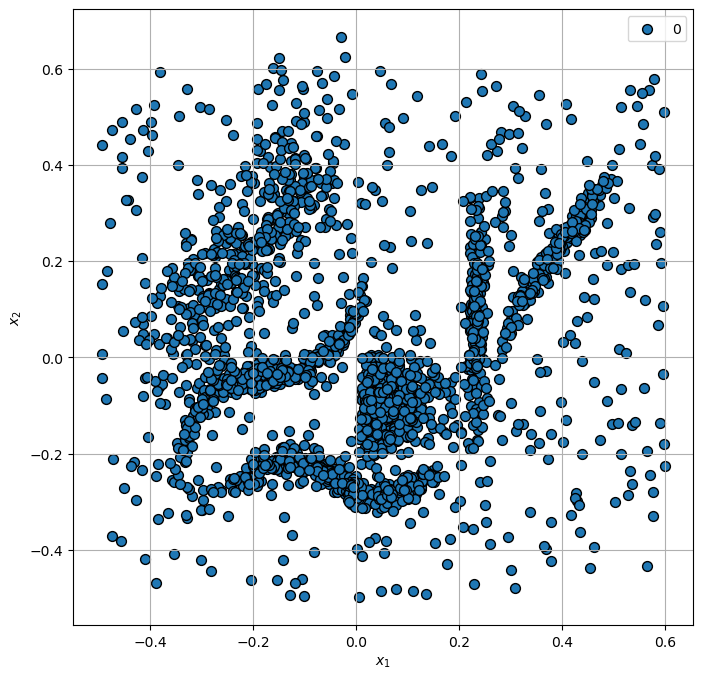

In [9]:
# Plot the Data

hF, hA = plt.subplots(figsize = (8, 8))
hA = PlotScatterData(mX, vL, hA = hA)
# hA.set_title('Clustering Data');

## Cluster Data by HDBSCAN

* <font color='brown'>(**#**)</font> Pretty robust to hyper parameters.
* <font color='brown'>(**#**)</font> Slower than _DBSCAN_, yet pretty fast on its own.

In [10]:
# Plotting Function Wrapper
hPlotDensity = lambda clusterMethod, rVal, minNumSamplesCore, minNumSamplesCluster, metricMethod: PlotDensityBasedClustering(mX, clusterMethod, rVal, minNumSamplesCore, minNumSamplesCluster, metricMethod, figSize = (7, 7))

In [11]:
# Interactive Visualization

# HDBSCAN: minSamplesCore = 5, minSamplesCluster = 25

clusterMethodDropdown   = Dropdown(description = 'Clsuter Method', options = [('DBSCAN', 1), ('HDBSCAN', 2), ('OPTICS', 3)], value = 1)
rSlider                 = FloatSlider(min = 0.01, max = 0.5, step = 0.01, value = 0.05, layout = Layout(width = '30%'))
minSamplesCoreSlider    = IntSlider(min = 1, max = 25, step = 1, value = 3, layout = Layout(width = '30%'))
minSamplesClusterSlider = IntSlider(min = 3, max = 50, step = 1, value = 3, layout = Layout(width = '30%'))
metricMethodDropdown    = Dropdown(description = 'Metric Method', options = [('Cityblock', 'cityblock'), ('Euclidean', 'euclidean')], value = 'euclidean')
interact(hPlotDensity, clusterMethod = clusterMethodDropdown, rVal = rSlider, minNumSamplesCore = minSamplesCoreSlider, minNumSamplesCluster = minSamplesClusterSlider, metricMethod = metricMethodDropdown)

plt.show()

interactive(children=(Dropdown(description='Clsuter Method', options=(('DBSCAN', 1), ('HDBSCAN', 2), ('OPTICS'…

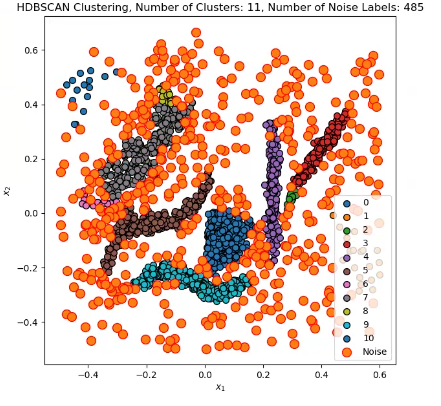